In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


from sklearn import datasets

from sklearn.preprocessing import StandardScaler

#Load dataset
wine = datasets.load_wine()
from matplotlib.patches import Circle

from sklearn.neighbors import KNeighborsClassifier

In [2]:
X, y = make_classification(n_samples = 200, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3,random_state=0)


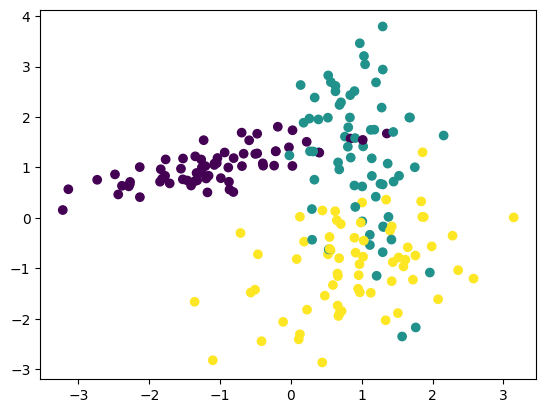

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['target']=wine.target

In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

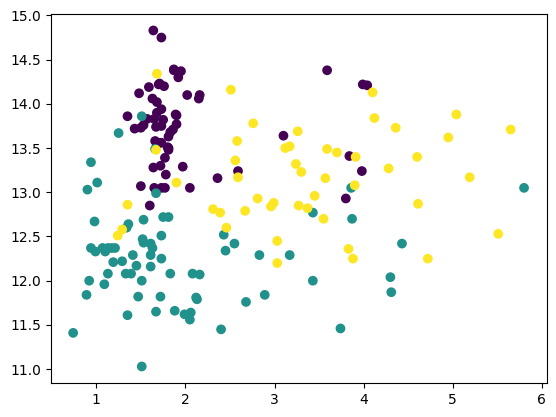

In [6]:
plt.scatter(df.malic_acid,df.alcohol,c=df.target)


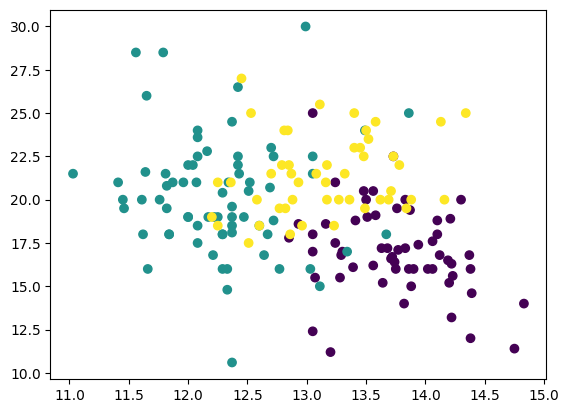

In [7]:
plt.scatter(df.alcohol,df.alcalinity_of_ash,c=df.target)

In [8]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [10]:
X_train.shape

(150, 2)

In [11]:




from cProfile import label


class KNearestNeighbor:
    def __init__(self,X_train,y_train,k=5,weights='uniform',n_class=3):
        self.X_train=X_train
       
        self.k=k 
        self.weights=weights 
        self.n_class=n_class
        self.y_train=y_train
        #if return_dist:
        #   self.return_dist=return_dist
        
    def euclidian_distance(self,a,b):
        self.distance=np.sqrt(np.sum((a-b)**2,axis=1))    
        return self.distance 
    def call(self,X_test,return_dist=False):
        #self.X_test=X_test
        #distance=self.distance 
        dist=[]
        neighbor_ind=[]
        point_dist=[self.euclidian_distance(x_test,X_train) for x_test in X_test]
        for row in point_dist:
            row_enumerate=enumerate(row)
            sorted_neigh=sorted(row_enumerate,key=lambda x: x[1])[:self.k]
            ind_list=[tup[0] for tup in sorted_neigh]
            dist_list=[tup[1] for tup in sorted_neigh]
            
            
            dist.append(dist_list)
            neighbor_ind.append(ind_list)
            
            if return_dist:
                return np.array(dist),np.array(neighbor_ind)
            else:
                return np.array(neighbor_ind)
    def predict(self,X_test):
        self.test=X_test
        
        dist,neigh_ind=self.call(X_test,return_dist=True)
        print(dist)
        inv_dist=1/dist
        mean_dist=inv_dist/np.sum(inv_dist,axis=1)[:,np.newaxis]
        self.max_dist=dist[-1][-1]
        print('mean dist',mean_dist)
        if self.weights=='uniform':
            neighbors=self.call(X_test)   
            y_pred=[np.argmax(np.bincount(self.y_train[neighbor])) for neighbor in neighbors]
            
            
            return y_pred 
        else:
            dist,neigh_ind=self.call(X_test,return_dist=True)
            
            self.max_dist=dist[-1]
            inv_dist=1/dist
            mean_inv_dist=inv_dist/np.sum(inv_dist,axis=1)[:,np.newaxis]
            
            prob=[]
            for i,row in enumerate(mean_inv_dist):
                row_pred=y_train[neigh_ind[i]]
                for j in range(len(self.n_class)):
                    indices=np.where(self.y_train==j)
                    prob_indices=np.sum(row[indices])
                    prob.append(np.array(prob_indices))
            predict_prob=np.array(prob).reshape(self.x_test.shape[0],len(self.n_class))
            self.y_pred=[np.argmax(item)for item in  predict_prob]
        
            
            return self.y_pred 
        
        
        
    def Plot(self):
        figure, axes = plt.subplots()
            
        axes.scatter(self.X_train[:,0],self.X_train[:,1],c=self.y_train,label=[[0,1,2]])
        
        scatter=axes.scatter(self.test[0],self.test[1],color='blue')  
        Drawing_uncolored_circle = plt.Circle( (self.test[0], self.test[1]),
                                      self.max_dist ,
                                      fill = False )
        axes.set_aspect( 1 )
        axes.add_artist( Drawing_uncolored_circle )
        plt.xlim(self.X_train[:,0].min()-1.5,self.X_train[:,0].max()+1.5)
        plt.ylim(self.X_train[:,1].min()-1.5,self.X_train[:,1].max()+1.5)
        
        
        
        axes.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
        #axes.add_artist(legend1)
        axes.set_title('max distance for  k is {} ={:.4f} \n predict label is {}  '.format(self.k,self.max_dist,np.array(self.predict(self.test))))
        
               
            
            
            
            
        
        

In [12]:
knn=KNearestNeighbor(X_train,y_train)


In [13]:
x_test=X_test[10]
y_test[10]



0

In [14]:
y_pred=knn.predict(x_test)
y_pred

[[0.90800722 1.23797852 1.6984658  1.74609355 1.77628179]]
mean dist [[0.30309733 0.22230964 0.16203715 0.15761731 0.15493857]]


[2]

In [15]:
y_test[10]

0

/home/jabed/.local/lib/python3.8/site-packages/matplotlib/collections.py:1097: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


[[0.90800722 1.23797852 1.6984658  1.74609355 1.77628179]]
mean dist [[0.30309733 0.22230964 0.16203715 0.15761731 0.15493857]]


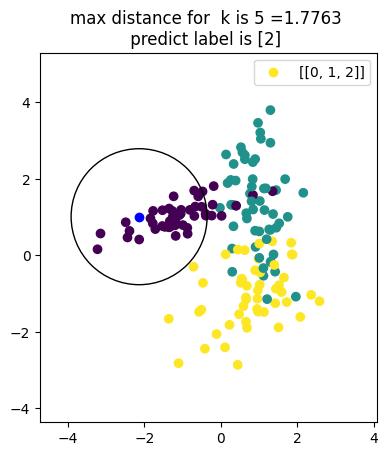

In [16]:
knn.Plot()

In [17]:
neigh=neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
neigh.predict(x_test.reshape((1,-1)))

array([0])

In [18]:
dist_knn,_=neigh.kneighbors(x_test.reshape((1,-1)),return_distance=True)
predict=neigh.predict(x_test.reshape((1,-1)))
max_dist_knn=dist_knn[-1][-1]
max_dist_knn

0.4482845360499049

In [19]:
def Plot():
        df=pd.DataFrame(X_train,columns=['col1','col2'])
        df['target']=y_train
        
        figure, axes = plt.subplots()
        axes.scatter(df.col1[df.target==0],df.col2[df.target==0],color='y',label=0)
        axes.scatter(df.col1[df.target==1],df.col2[df.target==1],color='g',label=1)
        axes.scatter(df.col1[df.target==2],df.col2[df.target==2],color='c',label=2)
            
        #axes.scatter(X_train[:,0],X_train[:,1],c=y_train,label=[0])
        
        axes.scatter(x_test[0],x_test[1],color='blue',label='test')
        axes.legend()  
        Drawing_uncolored_circle = plt.Circle( (x_test[0], x_test[1]),
                                    max_dist_knn,
                                     fill = False )
        axes.set_aspect( 1 )
        axes.add_artist( Drawing_uncolored_circle )
        plt.xlim(X_train[:,0].min()-1.5,X_train[:,0].max()+1.5)
        plt.ylim(X_train[:,1].min()-1.5,X_train[:,1].max()+1.5)
        
        
        
       
       
        axes.set_title('max distance for  k is {} ={:.4f} \n predict label is {}  '.format(5,max_dist_knn,predict))
        
               

In [20]:
# figure, axes = plt.subplots()
# axes.scatter(X_train[:,0],X_train[:,1],c=y_train)
# axes.scatter(x_test[0],x_test[1],color='blue')
# Drawing_uncolored_circle = plt.Circle( (x_test[0], x_test[1] ),
#                                       0.3 ,
#                                       fill = False )
# plt.xlim(X_train[:,0].min()-1.5,X_train[:,0].max()+1.5)
# plt.ylim(X_train[:,1].min()-1.5,X_train[:,1].max()+1.5)
 
# axes.set_aspect( 1 )
# axes.add_artist( Drawing_uncolored_circle )

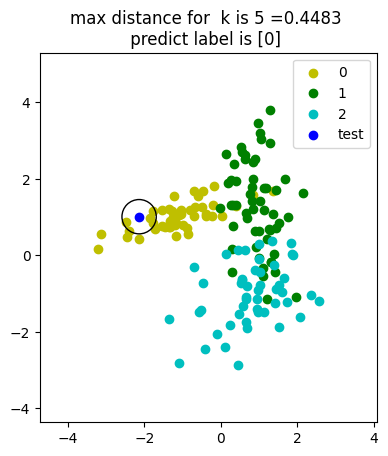

In [21]:
Plot()

(-4.362424034990829, 5.293042536936955)

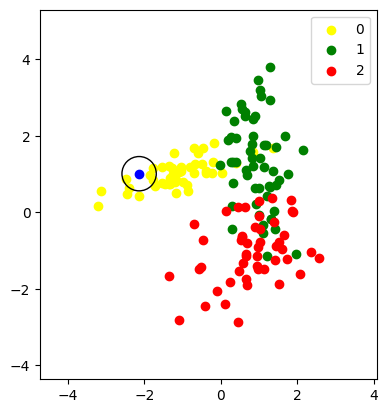

In [27]:

color=['yellow','green','red']
df=pd.DataFrame(X_train,columns=['col1','col2'])
df['target']=y_train
        
figure, axes = plt.subplots()
[axes.scatter(df.col1[df.target==i],df.col2[df.target==i],color=color[i],label=i)  for i in range(3) ]
axes.legend()
axes.scatter(x_test[0],x_test[1],color='blue',label='test')
#axes.legend()  
Drawing_uncolored_circle = plt.Circle( (x_test[0], x_test[1]),
                                    max_dist_knn,
                                     fill = False )
axes.set_aspect( 1 )
axes.add_artist( Drawing_uncolored_circle )
plt.xlim(X_train[:,0].min()-1.5,X_train[:,0].max()+1.5)
plt.ylim(X_train[:,1].min()-1.5,X_train[:,1].max()+1.5)